# EDA and Visualizations

## Imports
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Hiding Pink Warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Reading in Data
***

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    X = pd.read_csv('/content/drive/MyDrive/train_values.csv')
    y = pd.read_csv('/content/drive/MyDrive/train_labels.csv')
    X_test = pd.read_csv('/content/drive/MyDrive/test_values.csv')
except:
    X = pd.read_csv('data/train_values.csv')
    y = pd.read_csv('data/train_labels.csv')
    X_test = pd.read_csv('data/test_values.csv')

## Preliminary Data Overview
---

In [3]:
X.shape, y.shape

((260601, 39), (260601, 2))

In [4]:
X_test.shape

(86868, 39)

In [5]:
X.isnull().sum().sum(), y.isnull().sum().sum()

(0, 0)

In [6]:
X.dtypes.value_counts()

int64     31
object     8
dtype: int64

In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [8]:
y[['damage_grade']].mean()

damage_grade    2.238272
dtype: float64

In [9]:
y['damage_grade'].value_counts(normalize=True)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

### Combining separate data files

In [10]:
data = pd.merge(left = X, right = y, left_on = X['building_id'], right_on = y['building_id'] )

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   key_0                                   260601 non-null  int64 
 1   building_id_x                           260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

#### Checking to see that building IDs match in value and label files

In [12]:
(data['building_id_x'] == data['building_id_y']).value_counts(normalize=True)

True    1.0
dtype: float64

#### Dropping extra ID columns

In [13]:
data.rename(columns={'key_0':'building_id'},inplace=True)
data.drop(columns=['building_id_x','building_id_y'],inplace=True)
data.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2


In [14]:
len(data.columns)

40

In [15]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

## Visualizations
---

#### The creator of this DrivenData Competition replaced the labels in categorical variables with completely random alphabetical characters.
#### This is likely to discourage contestants from using outside data sources to facilitate damage grade classification such as the susceptibility of certain building materials to earthquakes.

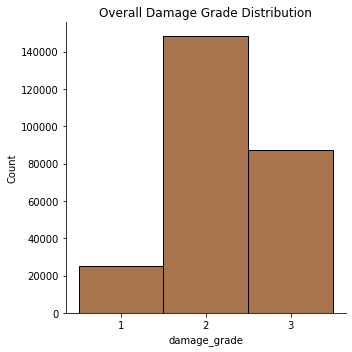

In [16]:

sns.distributions.displot(data['damage_grade'].astype('string').sort_values(),color='saddlebrown')
plt.title('Overall Damage Grade Distribution');
plt.tight_layout()
plt.savefig(f'figures/Overall_Damage_Grade_Distribution.png')

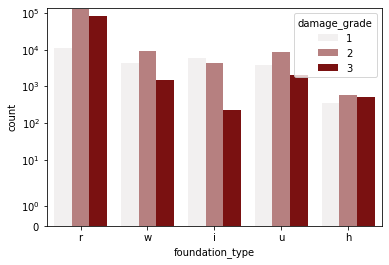

In [17]:
# Testing Log Scaled Count Plots with Foundation Type
sns.countplot(data['foundation_type'],color='darkred',hue=data['damage_grade'])
plt.yscale('symlog')

In [18]:
X.dtypes[X.dtypes=='object'].index

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

### Visualizing the Categorical Variables
- Displaying the value counts of each feature
- Displaying the average damage grade grouped by the categorical variable
- Displaying the distribtutions of each feature
- Scaling the distributions logarithmically to see data that's squished by categories with high counts

__________________________________________________


,land_surface_condition,normalized
t,216757,0.831758
n,35528,0.136331
o,8316,0.031911


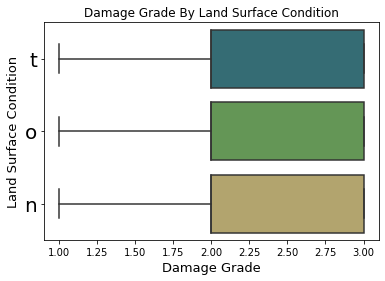

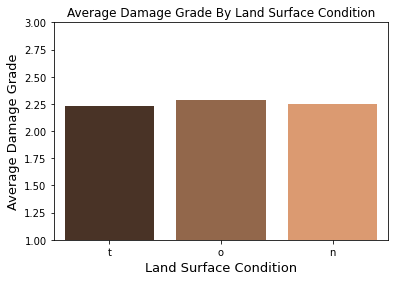

<Figure size 432x288 with 0 Axes>

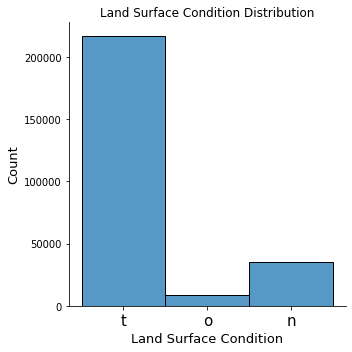

<Figure size 432x288 with 0 Axes>

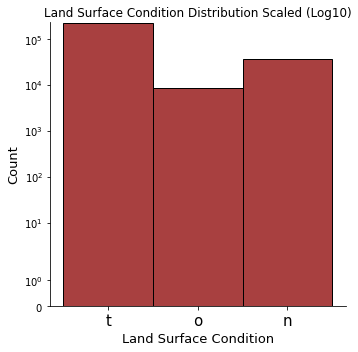

__________________________________________________


,foundation_type,normalized
r,219196,0.841117
w,15118,0.058012
u,14260,0.054720
i,10579,0.040595
h,1448,0.005556


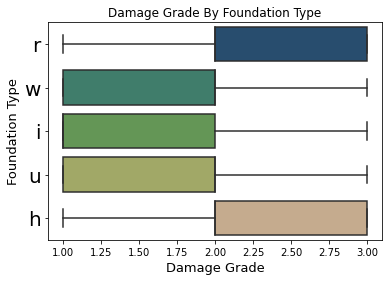

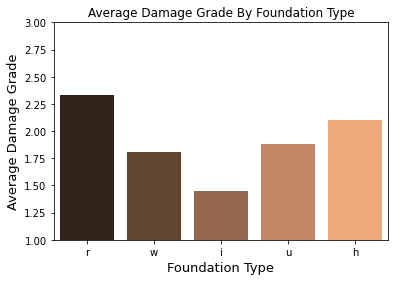

<Figure size 432x288 with 0 Axes>

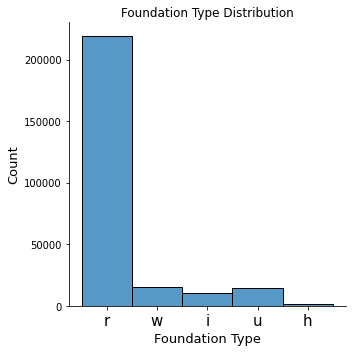

<Figure size 432x288 with 0 Axes>

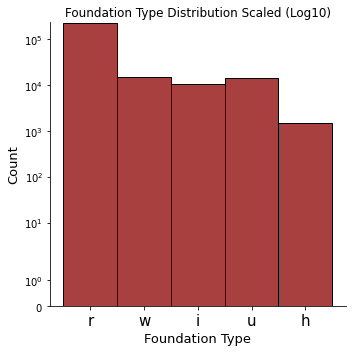

__________________________________________________


,roof_type,normalized
n,182842,0.701617
q,61576,0.236285
x,16183,0.062099


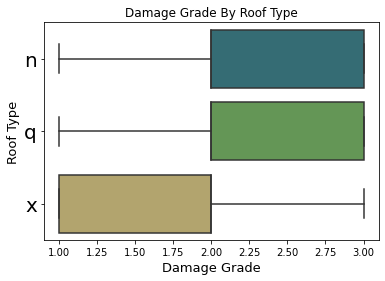

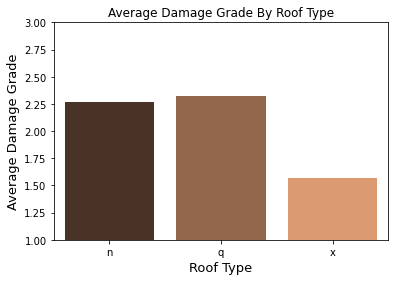

<Figure size 432x288 with 0 Axes>

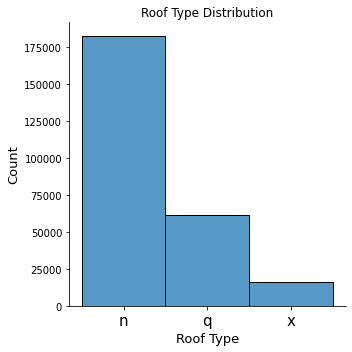

<Figure size 432x288 with 0 Axes>

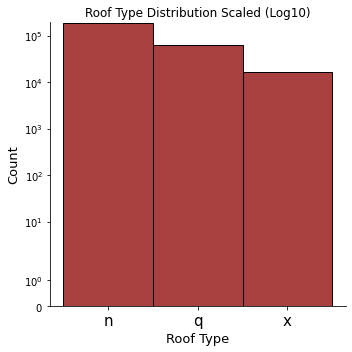

__________________________________________________


,ground_floor_type,normalized
f,209619,0.804368
x,24877,0.095460
v,24593,0.094370
z,1004,0.003853
m,508,0.001949


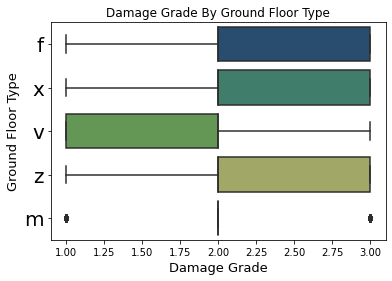

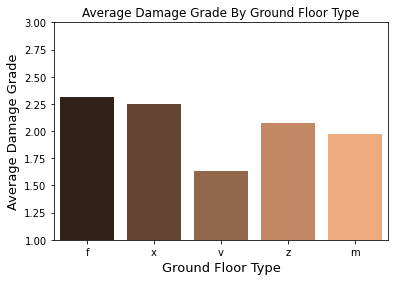

<Figure size 432x288 with 0 Axes>

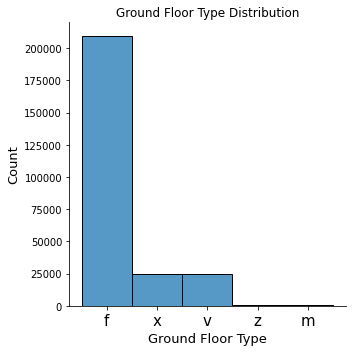

<Figure size 432x288 with 0 Axes>

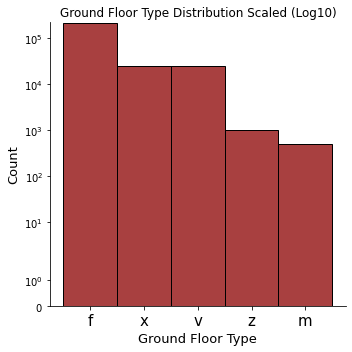

__________________________________________________


,other_floor_type,normalized
q,165282,0.634234
x,43448,0.166722
j,39843,0.152889
s,12028,0.046155


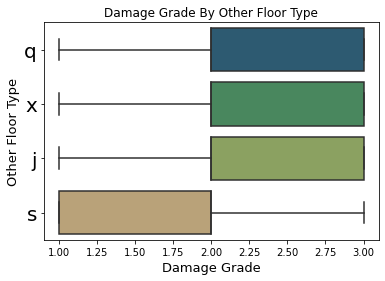

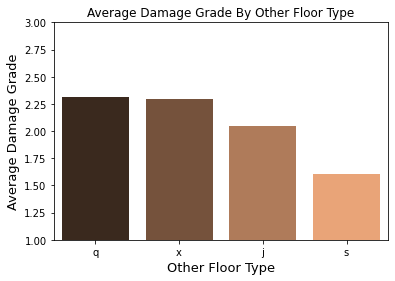

<Figure size 432x288 with 0 Axes>

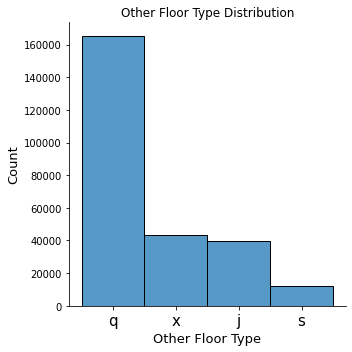

<Figure size 432x288 with 0 Axes>

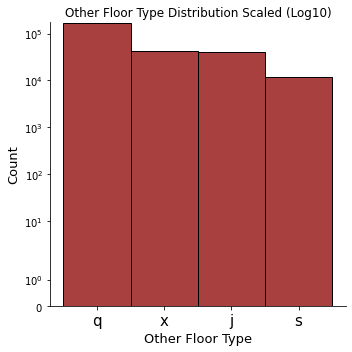

__________________________________________________


,position,normalized
s,202090,0.775477
t,42896,0.164604
j,13282,0.050967
o,2333,0.008952


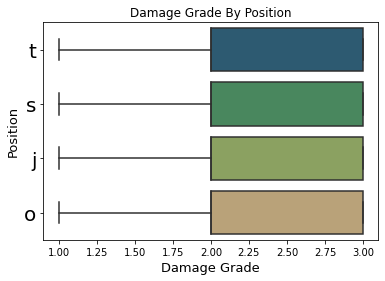

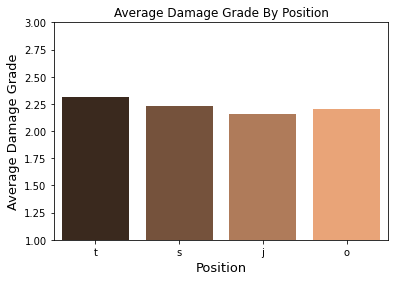

<Figure size 432x288 with 0 Axes>

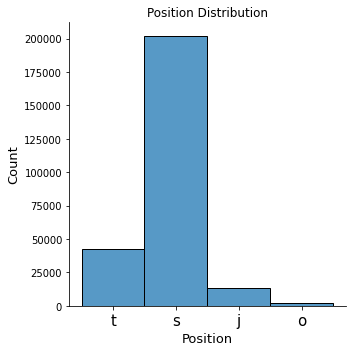

<Figure size 432x288 with 0 Axes>

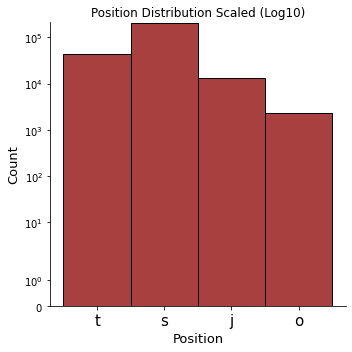

__________________________________________________


,plan_configuration,normalized
d,250072,0.959597
q,5692,0.021842
u,3649,0.014002
s,346,0.001328
c,325,0.001247
a,252,0.000967
o,159,0.000610
m,46,0.000177
n,38,0.000146
f,22,0.000084


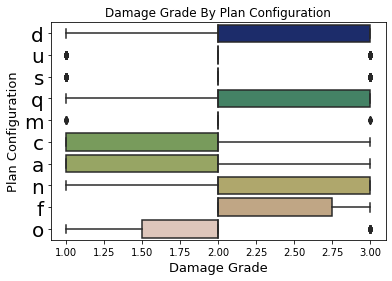

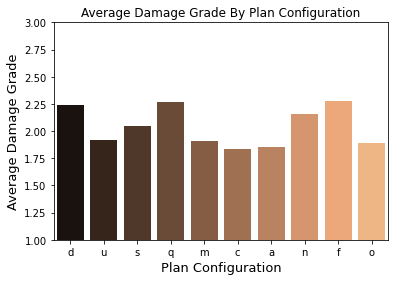

<Figure size 432x288 with 0 Axes>

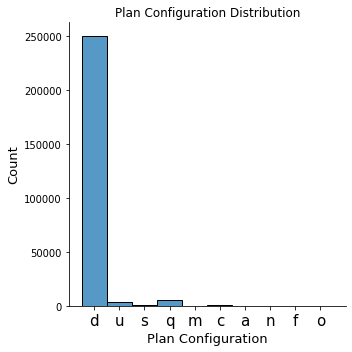

<Figure size 432x288 with 0 Axes>

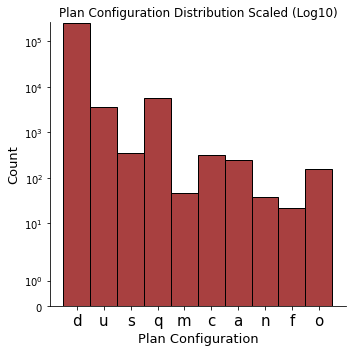

__________________________________________________


,legal_ownership_status,normalized
v,250939,0.962924
a,5512,0.021151
w,2677,0.010272
r,1473,0.005652


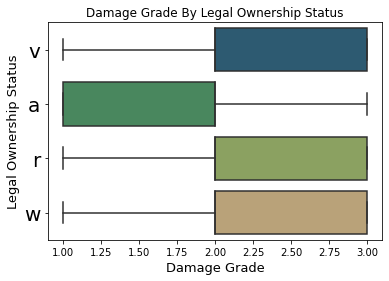

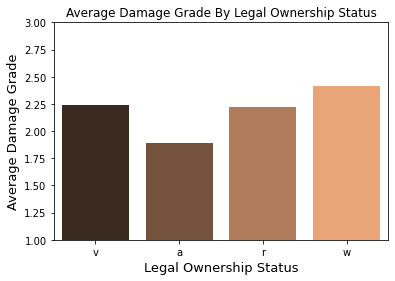

<Figure size 432x288 with 0 Axes>

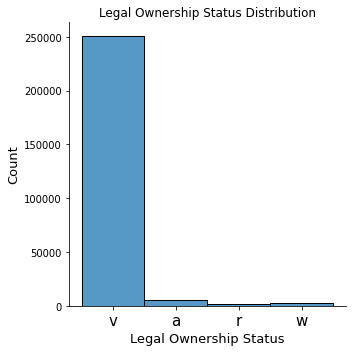

<Figure size 432x288 with 0 Axes>

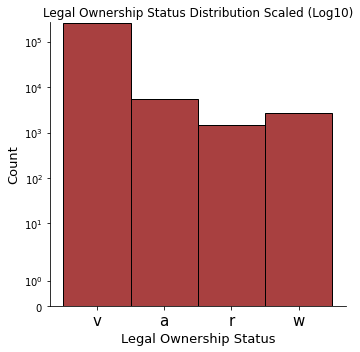

In [19]:
for col in X.dtypes[X.dtypes=='object'].index:
    print('__________________________________________________')
    
    #Value Count Table
    df = pd.concat([data[col].value_counts(),data[col].value_counts(normalize=True)],axis=1)
    df.columns = [col,'normalized']
    display(df)
    
    #Box Plot
    plt.figure()
    sns.boxplot(x=data['damage_grade'],y=data[col],palette='gist_earth')
    plt.yticks(fontsize=20)
    plt.xlabel('Damage Grade',fontsize=13)
    plt.ylabel(col.replace('_',' ').title(),fontsize=13)
    title = f'Damage Grade by {col}'.replace(' ','_').title()
    plt.title(title.replace('_',' '))
    plt.savefig(f'figures/{title}.png')
    plt.show();
    
    #Barplot
    plt.figure()
    sns.barplot(x=data[col],y=data['damage_grade'],ci=False,palette='copper')
    plt.ylim(1,3)
    plt.xlabel(col.replace('_',' ').title(),fontsize=13)
    plt.ylabel("Average Damage Grade",fontsize=13)
    title = f'Average Damage Grade by {col}'.replace(' ','_').title()
    plt.title(title.replace('_',' '))
    plt.savefig(f'figures/{title}.png')
    plt.show()
    
    #Distribution
    plt.figure()
    sns.distributions.displot(data[col])
    plt.xticks(fontsize=15)
    plt.xlabel(col.replace('_',' ').title(),fontsize=13)
    plt.ylabel('Count',fontsize=13)
    title = f'{col} distribution'.replace(' ','_').title()
    plt.title(title.replace('_',' '))
    plt.tight_layout()
    plt.savefig(f'figures/{title}.png')
    plt.show();
    
    #Distribution with Y axis scaled for visibility
    plt.figure()
    sns.distributions.displot(data[col],color='darkred')
    plt.yscale('symlog')
    plt.xticks(fontsize=15)
    plt.xlabel(col.replace('_',' ').title(),fontsize=13)
    plt.ylabel('Count',fontsize=13)
    title = f'{col} Distribution Scaled (Log10)'.replace(' ','_').title()
    plt.title(title.replace('_',' '))
    plt.tight_layout()
    plt.savefig(f'figures/{title}.png')
    plt.show();

### Visualizing the Numerical Variables

In [20]:
nb_numerical_features = list(data.columns[1:8])
nb_numerical_features.append('damage_grade')
nb_numerical_features.append('count_families')

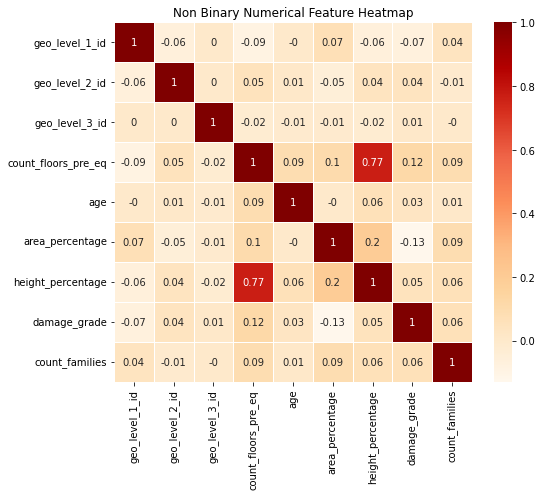

In [21]:
plt.figure(figsize=(8,7))
sns.heatmap(round(data[nb_numerical_features].corr(),2),cmap='OrRd',annot=True,linewidths=1)
plt.title('Non Binary Numerical Feature Heatmap');
plt.tight_layout()
plt.savefig(f'figures/Non_Binary_Numerical_Feature_Heatmap.png')

In [22]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

### Visualizing individual Non-binary numerical features

In [23]:
nb_numerical_features[:-1]

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'damage_grade']

In [24]:
data['height_percentage'].describe()

count    260601.000000
mean          5.434365
std           1.918418
min           2.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          32.000000
Name: height_percentage, dtype: float64

In [25]:
data['area_percentage'].describe()

count    260601.000000
mean          8.018051
std           4.392231
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max         100.000000
Name: area_percentage, dtype: float64

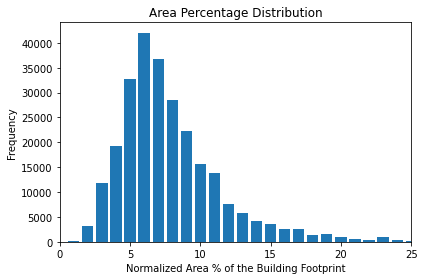

In [26]:
plt.figure()
plt.bar(x=data['area_percentage'].value_counts().index,height=data['area_percentage'].value_counts())
plt.xlim(0,25) #trimming outliers that make the histogram illegible
plt.title('Area Percentage Distribution')
plt.ylabel('Frequency')
plt.xlabel('Normalized Area % of the Building Footprint')
plt.tight_layout()
plt.savefig('figures/Area_Percentage_Distribution.png');

In [27]:
data['damage_grade'].groupby(data['count_floors_pre_eq']).mean()

count_floors_pre_eq
1    2.042160
2    2.239231
3    2.396713
4    2.117257
5    2.114426
6    1.856459
7    1.846154
8    2.000000
9    1.000000
Name: damage_grade, dtype: float64

In [28]:
data['damage_grade'].groupby(data['count_floors_pre_eq']).count()

count_floors_pre_eq
1     40441
2    156623
3     55617
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: damage_grade, dtype: int64

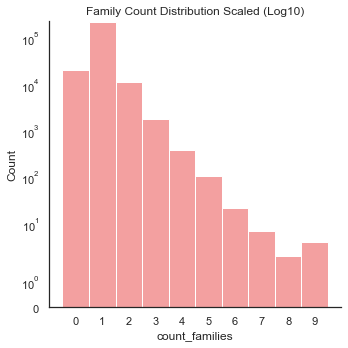

In [29]:
#Scaling Y axis by Log 10 so the 1 value for Family Count doesn't obscure the rest of the data
sns.set_theme(style='white')
sns.distributions.displot(data['count_families'].astype('string').sort_values(),color='lightcoral')
plt.title('Family Count Distribution Scaled (Log10)');
plt.yscale('symlog')
plt.tight_layout()
plt.savefig(f'figures/Family_Count_Distribution_Scaled_(Log10).png')

In [30]:
#Unique Values for Plotting Building Age
ages = data['age'].unique()
ages.sort()

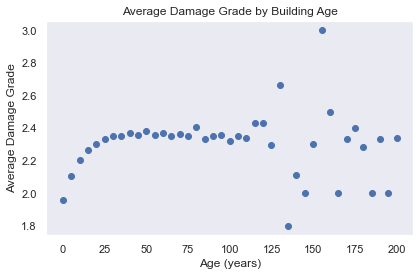

In [31]:
sns.set_theme(style='dark')
plt.figure()
plt.scatter(ages[:-1],data['damage_grade'].groupby(data['age']).mean()[:-1])
plt.title('Average Damage Grade by Building Age')
plt.xlabel('Age (years)')
plt.ylabel('Average Damage Grade')
plt.tight_layout()
plt.savefig(f'figures/Average_Damage_Grade_by_Age.png');

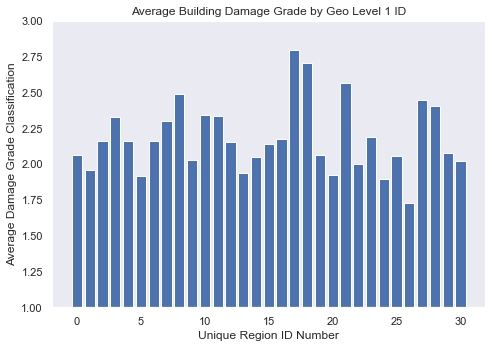

In [32]:
plt.figure(figsize=(7,5))
plt.bar(x=range(0,31),height=data['damage_grade'].groupby(data['geo_level_1_id']).mean())
plt.ylim(1,3)
plt.xlabel('Unique Region ID Number')
plt.ylabel('Average Damage Grade Classification')
plt.title('Average Building Damage Grade by Geo Level 1 ID');
plt.tight_layout()
plt.savefig('figures/Average_Damage_Grade_by_Geo_Level_1.png')
plt.show()

In [33]:
(
len(data['geo_level_1_id'].unique()),
len(data['geo_level_2_id'].unique()),
len(data['geo_level_3_id'].unique())
)

(31, 1414, 11595)

#### Comparing the distributions of the number of buildings located in different geographical regions by level
- Level 1 consists of the largest regions and is not evenly distributed (31 possible values)
- Level 2 consists of more specific regions and is more evenly distributed than level 1 (1414 possible values)
- Level 3 consists of the most specific regions and building data is almost completely evenly distributed (11,595 unique values)

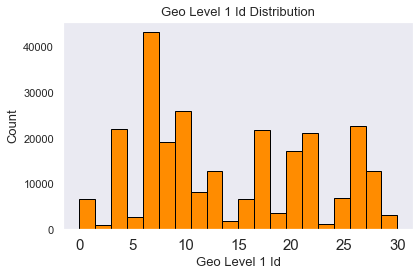

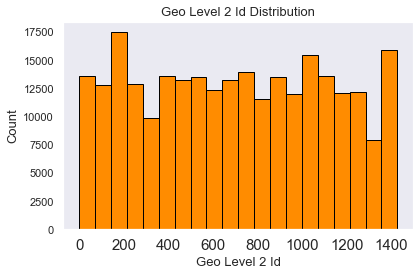

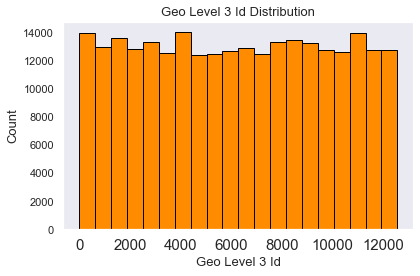

In [34]:
for i in [1,2,3]:
    sns.set_theme(style='dark')
    plt.figure(facecolor=None)
    col = f'geo_level_{i}_id'
    plt.hist(data[col],bins=20,color='darkorange',edgecolor='black',cumulative=False)
    plt.xticks(fontsize=15)
    plt.xlabel(col.replace('_',' ').title(),fontsize=13)
    plt.ylabel('Count',fontsize=13)
    title = f'{col} distribution'.replace(' ','_').title()
    plt.title(title.replace('_',' '),fontsize=13)
    plt.tight_layout()
    plt.savefig(f'figures/{title}.png')
    plt.show();

### Taking all of the binary features in the dataset and getting the mean damage class grouped by each feature
#### This allows us to see which binary features indicate the biggest difference between damage grade

In [35]:
binary_variables = list(data.columns[data.columns.str.contains('has_s')])

In [36]:
binary_damage_avg = pd.DataFrame()
for col in binary_variables:
    df = (data[['damage_grade']].groupby(data[col]).mean())
    df.columns = [col]
    binary_damage_avg = pd.concat([binary_damage_avg,df],axis=1)
binary_damage_avg = binary_damage_avg.T
binary_damage_avg['difference'] = binary_damage_avg[1]-binary_damage_avg[0]
binary_damage_avg.columns = ['No','Yes','Difference']
binary_damage_avg.sort_values('Difference')

,No,Yes,Difference
has_superstructure_rc_engineered,2.252176,1.375514,-0.876662
has_superstructure_cement_mortar_brick,2.282631,1.693296,-0.589335
has_secondary_use_institution,2.238811,1.665306,-0.573505
has_secondary_use_rental,2.242903,1.671246,-0.571657
has_superstructure_rc_non_engineered,2.258679,1.779530,-0.479150
has_secondary_use_gov_office,2.238342,1.763158,-0.475184
has_secondary_use_health_post,2.238344,1.857143,-0.381201
has_secondary_use_school,2.238408,1.861702,-0.376706
has_secondary_use_hotel,2.249450,1.917038,-0.332412
has_superstructure_cement_mortar_stone,2.243300,1.967593,-0.275707


#### Notable insights:
- Whether has_superstructure_rc_engineered is true or not has the biggest variation in average damage class where False indicates a higher average damage class than True
- Whether has_superstructure_mud_mortar_stone  is true or not has the biggest variation in average damage class where False indicates a lower average damage class than True
- Has_secondary_use_agriculture has the least variance in damage class averages between True and False, suggesting that this feature has the lowest correlation with damage class out of all of the binary features

In [37]:
binary_variables.append('damage_grade')

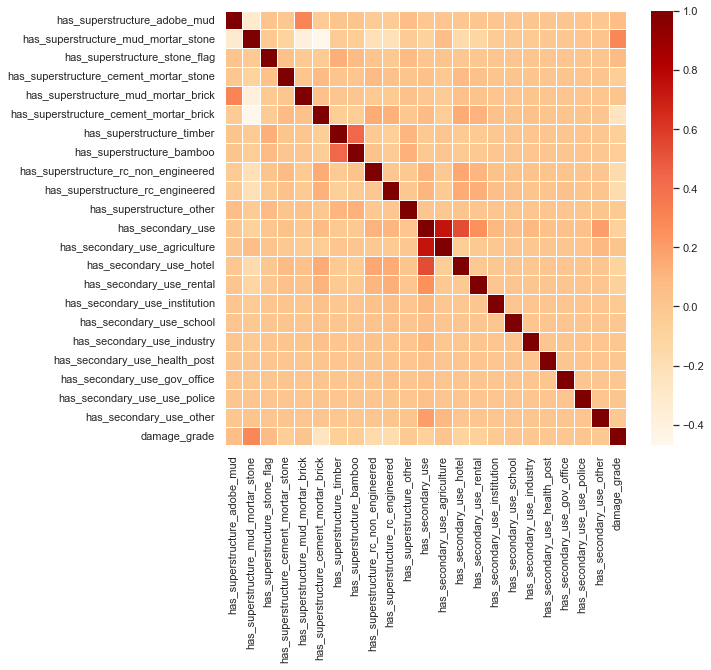

In [38]:
plt.figure(figsize=(9,8))
sns.heatmap(round(data[binary_variables].corr(),2),cmap='OrRd',linewidths=1);

### Combining train values and test values to compare distributions
None of the distribution pairs seem to be significantly different

In [39]:
X_all = pd.concat([X,X_test])
X.shape,X_all.shape

((260601, 39), (347469, 39))

In [40]:
for col in X.dtypes[X.dtypes=='object'].index:
    df = pd.concat([X[col].value_counts(normalize=True),X_all[col].value_counts(normalize=True)],axis=1)
    df.columns = [col+' (Train)',col+' (all)']
    df['difference'] = df[col+' (Train)']-df[col+' (all)']
    display(df)

,land_surface_condition (Train),land_surface_condition (all),difference
t,0.831758,0.831548,0.000211
n,0.136331,0.136452,-0.000121
o,0.031911,0.032000,-0.000089


,foundation_type (Train),foundation_type (all),difference
r,0.841117,0.841439,-0.000322
w,0.058012,0.057697,0.000315
u,0.054720,0.054416,0.000303
i,0.040595,0.040815,-0.000221
h,0.005556,0.005632,-0.000076


,roof_type (Train),roof_type (all),difference
n,0.701617,0.702149,-0.000532
q,0.236285,0.235719,0.000566
x,0.062099,0.062132,-0.000033


,ground_floor_type (Train),ground_floor_type (all),difference
f,0.804368,0.804650,-0.000283
x,0.095460,0.095286,0.000174
v,0.094370,0.094198,0.000172
z,0.003853,0.003839,0.000013
m,0.001949,0.002026,-0.000077


,other_floor_type (Train),other_floor_type (all),difference
q,0.634234,0.633973,0.000261
x,0.166722,0.167321,-0.000599
j,0.152889,0.152278,0.000611
s,0.046155,0.046427,-0.000272


,position (Train),position (all),difference
s,0.775477,0.775502,-0.000026
t,0.164604,0.164786,-0.000182
j,0.050967,0.050787,0.000180
o,0.008952,0.008925,0.000028


,plan_configuration (Train),plan_configuration (all),difference
d,0.959597,0.959300,0.000297
q,0.021842,0.021990,-0.000149
u,0.014002,0.014128,-0.000126
s,0.001328,0.001292,0.000035
c,0.001247,0.001295,-0.000048
a,0.000967,0.001016,-0.000049
o,0.000610,0.000561,0.000049
m,0.000177,0.000184,-0.000008
n,0.000146,0.000155,-0.000010
f,0.000084,0.000078,0.000007


,legal_ownership_status (Train),legal_ownership_status (all),difference
v,0.962924,0.963059,-0.000134
a,0.021151,0.021029,0.000122
w,0.010272,0.010185,0.000087
r,0.005652,0.005727,-0.000075


#### Using Raw Data from here to deduce the value types for the categorical variables
#### Could not accurately identify every category value type since the normalized value count of some of the value types are nearly identical. Some can be obviously distinguished based on website data such as 80+% of Foundation Types being a combination of mud mortar and stone brick, which is safely recognizable from website data as the next highest value type has a frequency of 7.5 percent.
http://eq2015.npc.gov.np/#/download

In [41]:
raw = pd.read_csv('raw_data/csv_building_structure.csv')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [42]:
raw.shape

(762106, 31)

#### Normalized Value Counts of each categorical variable in the raw data, this data contains the value type names!

In [43]:
for col in raw.dtypes[raw.dtypes=='object'].index:
    display(raw[[col]].value_counts(normalize=True))
    print()

land_surface_condition
Flat                      0.828855
Moderate slope            0.138616
Steep slope               0.032530
dtype: float64

foundation_type       
Mud mortar-Stone/Brick    0.824972
Bamboo/Timber             0.075413
Cement-Stone/Brick        0.051495
RC                        0.042146
Other                     0.005973
dtype: float64

roof_type               
Bamboo/Timber-Light roof    0.660995
Bamboo/Timber-Heavy roof    0.280504
RCC/RB/RBC                  0.058501
dtype: float64

ground_floor_type
Mud                  0.811196
RC                   0.095983
Brick/Stone          0.086724
Timber               0.004716
Other                0.001382
dtype: float64

other_floor_type 
TImber/Bamboo-Mud    0.638897
Timber-Planck        0.162228
Not applicable       0.155913
RCC/RB/RBC           0.042963
dtype: float64

position       
Not attached       0.793136
Attached-1 side    0.169835
Attached-2 side    0.035310
Attached-3 side    0.001719
dtype: float64

plan_configuration             
Rectangular                        0.959523
Square                             0.023062
L-shape                            0.013225
T-shape                            0.001271
Multi-projected                    0.001233
Others                             0.000680
U-shape                            0.000588
E-shape                            0.000184
Building with Central Courtyard    0.000129
H-shape                            0.000105
dtype: float64

condition_post_eq                      
Damaged-Not used                           0.272886
Damaged-Rubble unclear                     0.164872
Damaged-Used in risk                       0.162509
Damaged-Repaired and used                  0.141446
Damaged-Rubble clear                       0.134090
Not damaged                                0.080224
Damaged-Rubble Clear-New building built    0.043472
Covered by landslide                       0.000501
dtype: float64

damage_grade
Grade 5         0.361853
Grade 4         0.241235
Grade 3         0.178996
Grade 2         0.114496
Grade 1         0.103419
dtype: float64

technical_solution_proposed
Reconstruction                 0.617009
Major repair                   0.169815
Minor repair                   0.145133
No need                        0.068043
dtype: float64

In [44]:
raw2 = pd.read_csv('raw_data/csv_building_ownership_and_use.csv')
raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   building_id                    762106 non-null  int64  
 1   district_id                    762106 non-null  int64  
 2   vdcmun_id                      762106 non-null  int64  
 3   ward_id                        762106 non-null  int64  
 4   legal_ownership_status         762106 non-null  object 
 5   count_families                 762104 non-null  float64
 6   has_secondary_use              762096 non-null  float64
 7   has_secondary_use_agriculture  762106 non-null  int64  
 8   has_secondary_use_hotel        762106 non-null  int64  
 9   has_secondary_use_rental       762106 non-null  int64  
 10  has_secondary_use_institution  762106 non-null  int64  
 11  has_secondary_use_school       762106 non-null  int64  
 12  has_secondary_use_industry    

In [45]:
for col in raw2.dtypes[raw2.dtypes=='object'].index:
    display(raw2[col].value_counts())
    print()

Private          731387
Public            19232
Institutional      7823
Other              3664
Name: legal_ownership_status, dtype: int64

In [46]:
raw['damage_grade'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

#### Dropping rows with Grade 4 and 5 as the target classification.

In [47]:
raw_dropped = raw[(raw['damage_grade']!='Grade 4') & (raw['damage_grade']!='Grade 5')]

In [48]:
raw_dropped.dropna(inplace=True)

#### Comparing categorical variable normalized value counts between the data without Grade 4 & 5 entries and the data *with* Grade 4 & 5 entries

In [49]:
for col in raw.dtypes[raw.dtypes=='object'].index:
    display(pd.concat([raw[col].value_counts(normalize=True),raw_dropped[col].value_counts(normalize=True)],axis=1))
    print()

,land_surface_condition,land_surface_condition
Flat,0.828855,0.837264
Moderate slope,0.138616,0.133891
Steep slope,0.032530,0.028845


,foundation_type,foundation_type
Mud mortar-Stone/Brick,0.824972,0.654481
Bamboo/Timber,0.075413,0.144808
Cement-Stone/Brick,0.051495,0.091221
RC,0.042146,0.102124
Other,0.005973,0.007366


,roof_type,roof_type
Bamboo/Timber-Light roof,0.660995,0.606187
Bamboo/Timber-Heavy roof,0.280504,0.255085
RCC/RB/RBC,0.058501,0.138728


,ground_floor_type,ground_floor_type
Mud,0.811196,0.699412
RC,0.095983,0.214385
Brick/Stone,0.086724,0.077558
Timber,0.004716,0.006232
Other,0.001382,0.002413


,other_floor_type,other_floor_type
TImber/Bamboo-Mud,0.638897,0.518067
Timber-Planck,0.162228,0.152028
Not applicable,0.155913,0.230865
RCC/RB/RBC,0.042963,0.099040


,position,position
Not attached,0.793136,0.805176
Attached-1 side,0.169835,0.146523
Attached-2 side,0.035310,0.045592
Attached-3 side,0.001719,0.002708


,plan_configuration,plan_configuration
Rectangular,0.959523,0.946662
Square,0.023062,0.022507
L-shape,0.013225,0.023426
T-shape,0.001271,0.002003
Multi-projected,0.001233,0.002394
Others,0.000680,0.001346
U-shape,0.000588,0.001028
E-shape,0.000184,0.000238
Building with Central Courtyard,0.000129,0.000264
H-shape,0.000105,0.000132


,condition_post_eq,condition_post_eq
Damaged-Not used,0.272886,0.251217
Damaged-Rubble unclear,0.164872,NaN
Damaged-Used in risk,0.162509,0.274216
Damaged-Repaired and used,0.141446,0.272444
Damaged-Rubble clear,0.134090,NaN
Not damaged,0.080224,0.202123
Damaged-Rubble Clear-New building built,0.043472,NaN
Covered by landslide,0.000501,NaN


,damage_grade,damage_grade
Grade 5,0.361853,NaN
Grade 4,0.241235,NaN
Grade 3,0.178996,0.450973
Grade 2,0.114496,0.288468
Grade 1,0.103419,0.260559


,technical_solution_proposed,technical_solution_proposed
Reconstruction,0.617009,0.093205
Major repair,0.169815,0.370463
Minor repair,0.145133,0.364988
No need,0.068043,0.171345
